# Spectral Leakage in Discrete Fourier Transforms

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
T = 10
T_points = 10000

t = np.linspace(0, T, T_points).reshape(1,-1)
t.shape

(1, 10000)

In [3]:
print(f'Sampling frequency used for plotting = {T_points/T} Hz')

Sampling frequency used for plotting = 1000.0 Hz


## Define Spectrum Plotting Function

Numpy FFT function is used

In [40]:
def plot_spectrum(x_t, REMOVE = 0, fs = T_points/T, mode='c'):
    N = len(x_t.T)
    x_f =np.fft.fftshift(np.abs(np.fft.fft(x_t))).reshape(-1)
    f = np.fft.fftshift(np.fft.fftfreq(N)*fs)
    if REMOVE!=0:
        x_f = x_f[REMOVE:-REMOVE]
        f = f[REMOVE:-REMOVE]
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude")
    plt.title("Frequency Spectrum")
    if mode=='d':
        plt.scatter(f,x_f)
    else:
        plt.plot(f,x_f)
    return f, x_f
    

In [41]:
# Sampling frequency
fs = 20

pulse_train = 0*t
n = T_points//(T*fs)
pulse_train[:,::n] = 1

## Monotone Signal

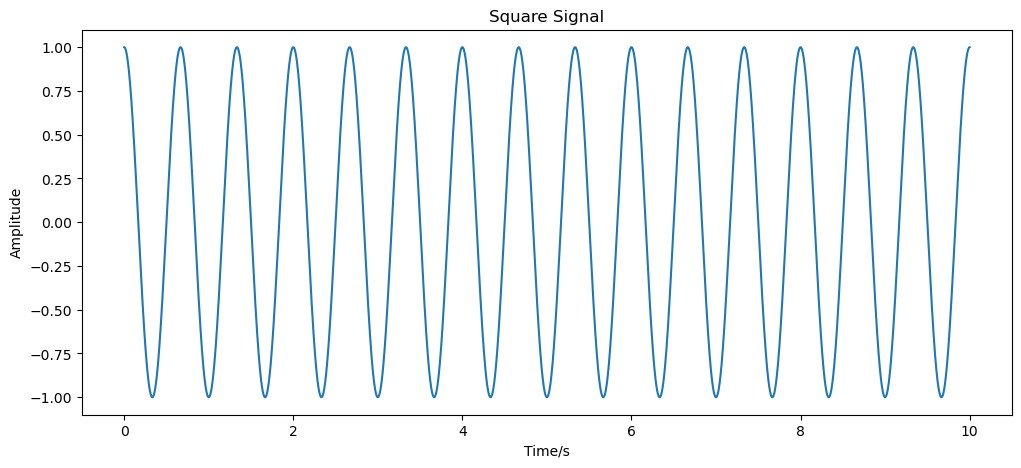

In [90]:
N_cycles = 15

freq = 0.1*N_cycles
phase = 0

x_t = np.cos(2*np.pi*freq*t+phase)

plt.figure(figsize=(12,5))
plt.title("Square Signal")
plt.plot(t.T, x_t.T)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

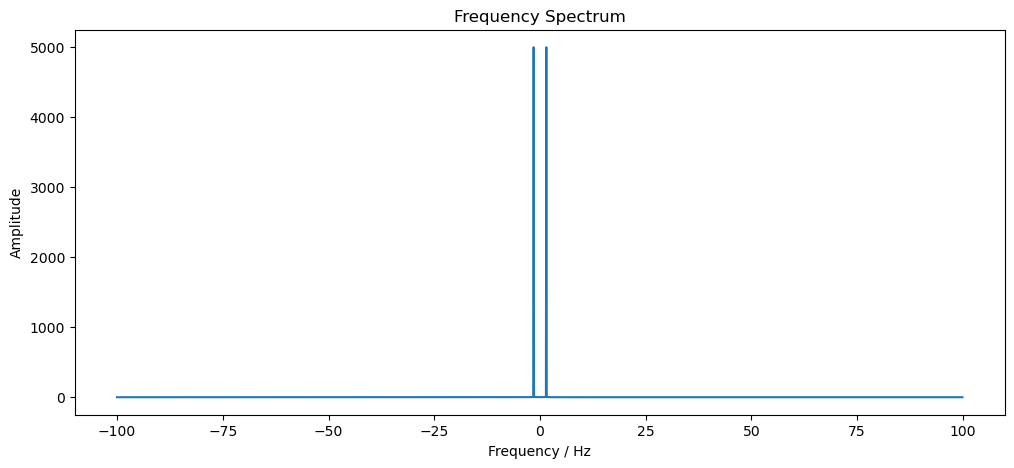

In [91]:
plt.figure(figsize=(12,5))
plot_spectrum(x_t, REMOVE=4000)
plt.show()

In [92]:
# Sampling frequency
fs = 20

pulse_train = 0*t
n = T_points//(T*fs)
pulse_train[:,::n] = 1

print(f'Normalized Frequency present = {freq/fs}')
print(f'Period = {fs/freq}')

Normalized Frequency present = 0.075
Period = 13.333333333333334


## "Discrete" Domain

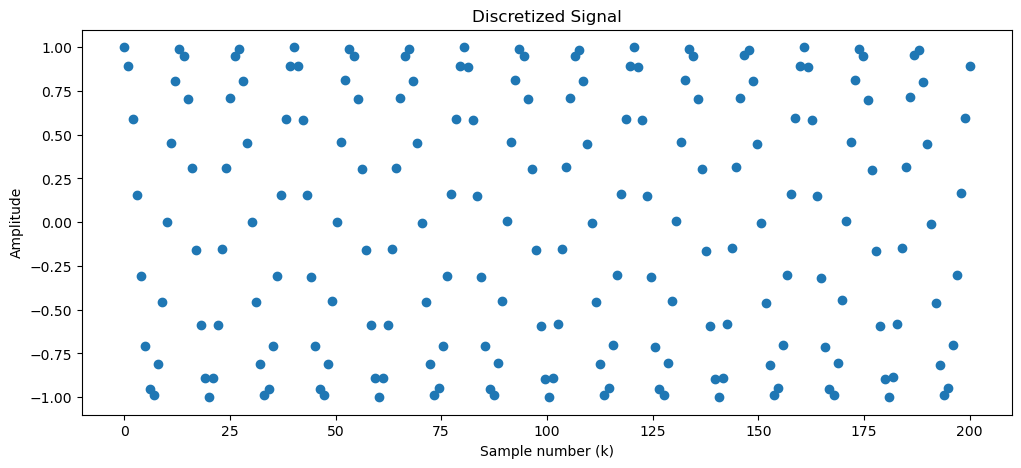

Length of signal 200 samples


In [93]:
x_k = x_t[pulse_train==1]
k = np.linspace(0,len(x_k), len(x_k))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k, x_k)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

print(f'Length of signal {len(k)} samples')

### Windowing the Signal

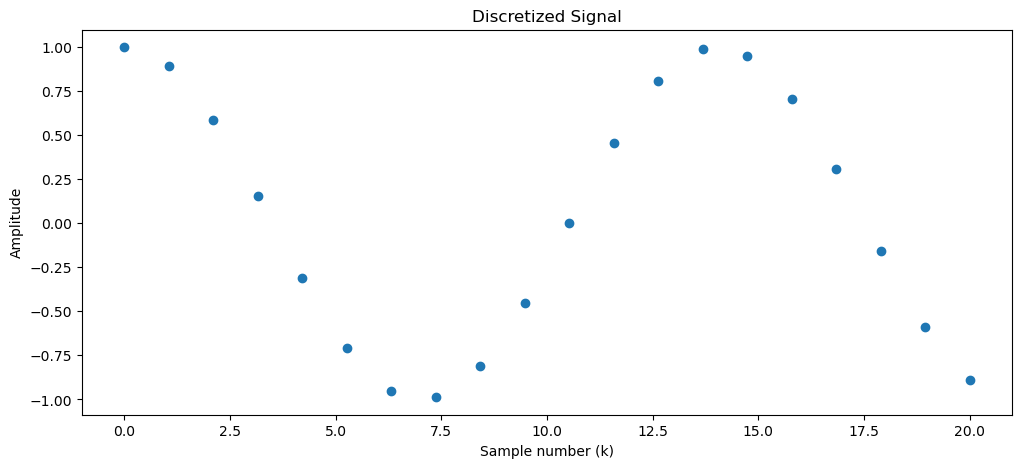

Length of signal 20 samples
Time Period of window = 1
Frequency resolution = 0.05 = 1.0 Hz


In [94]:
# Length of Window
WINDOW = 20

wind = (0*k).reshape(-1)
wind[0:WINDOW] = 1

x_k_w = x_k[0:WINDOW]
k_w = np.linspace(0,len(x_k_w), len(x_k_w))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k_w, x_k_w)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

print(f'Length of signal {len(k_w)} samples')
print(f'Time Period of window = {len(k_w)//fs}')
print(f'Frequency resolution = {1/len(k_w)} = {1/len(k_w)*fs} Hz')

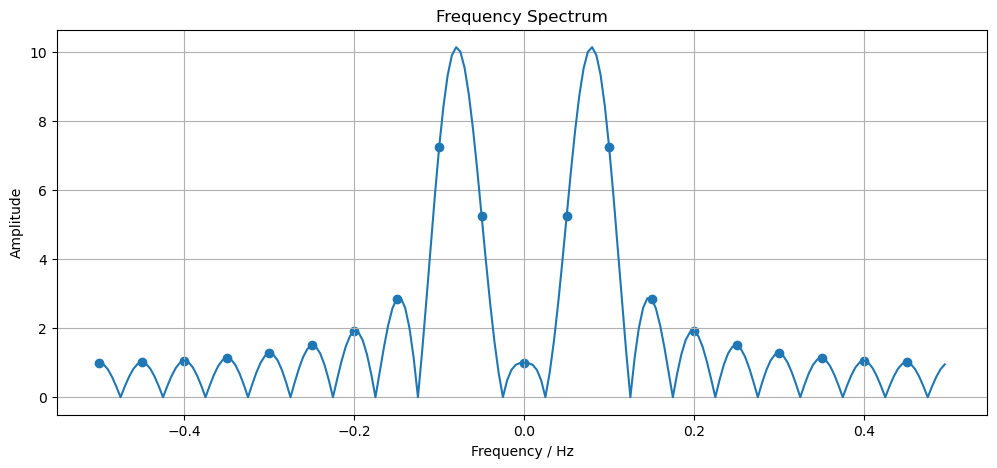

In [95]:
plt.figure(figsize=(12,5))
_,_ = plot_spectrum(x_k*wind, fs=1)
_,_ = plot_spectrum(x_k_w, fs=1, mode='d')
plt.grid()

Spectral leakage occurs because the window length is not an integer multiple of the period

### Use Hann Window to overcome this

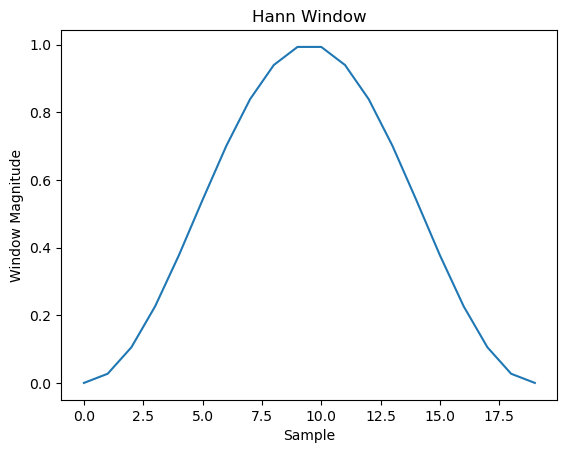

In [96]:
hann_window = scipy.signal.windows.hann(WINDOW)

plt.title("Hann Window")
plt.plot(hann_window)
plt.xlabel("Sample")
plt.ylabel("Window Magnitude")
plt.show()

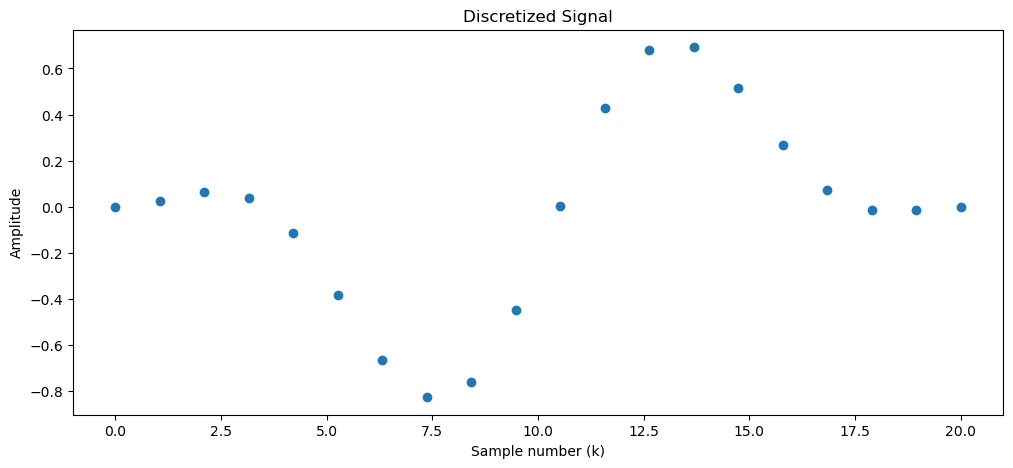

In [97]:
x_k_w = x_k[0:WINDOW]*hann_window
k_w = np.linspace(0,len(x_k_w), len(x_k_w))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k_w, x_k_w)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

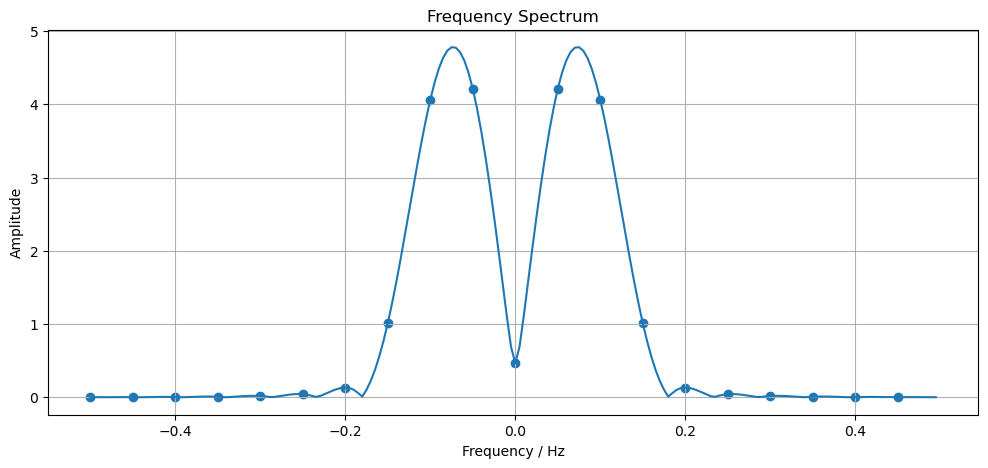

In [98]:
wind = (0*k).reshape(-1)
wind[0:WINDOW] = hann_window

plt.figure(figsize=(12,5))
_,_ = plot_spectrum(x_k*wind, fs=1)
_,_ = plot_spectrum(x_k_w, fs=1, mode='d')
plt.grid()

Spectral Leakage has been reduced. However, the peaks are still diffused